In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import *
from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.linear_model import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import *
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
!pip install shap
import shap

     |████████████████████████████████| 358kB 27.7MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=0c35277ba1ce955213e6b45659ff23a30a227697defb03a6f061fbd07e7e4f9e
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [4]:
data = pd.read_pickle('imputed_data_forest_corr.pkl')
data.head()

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,Food_InsecurityLevel,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,1.0,11.19,-0.95,254.0,7.0,2.0,1.040,4.0,1.9,44.69,5.0,0.0,0.0,2.0,0.0,0.0,246.141708,49.228342,274.373884,164.857702,77.460517,32.055664,0.0,0.717683,0.116832,4621.267353,754.360895,0.0,702.949550,0.696542,0.303458,135.0,3,-0.866025,0.500000,5.000000e-01,-0.866025,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,11.19,-0.95,346.0,10.0,1.2,4.000,3.0,1.9,40.68,4.0,0.0,0.0,2.0,0.0,0.0,18.317522,0.000000,298.162446,0.000000,279.844923,18.317522,0.0,0.061435,0.061435,2503.023263,2303.522017,0.0,15127.399228,0.539852,0.460148,100.0,4,-0.500000,0.866025,5.000000e-01,0.866025,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,11.19,-0.99,324.0,6.0,0.8,0.300,4.0,1.9,55.03,4.0,0.0,0.0,2.0,0.0,0.0,0.000000,0.000000,23.278518,0.000000,23.278518,0.000000,0.0,0.000000,0.000000,381.108158,381.108158,9.0,113.654565,0.695815,0.304185,50.0,4,-0.866025,0.500000,-5.000000e-01,0.866025,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,11.19,-0.99,326.0,6.0,0.8,2.595,4.0,1.9,32.23,5.0,0.0,0.0,1.0,0.0,0.0,476.255585,238.127792,264.840846,228.969031,26.713054,9.158761,0.0,0.899135,0.034582,1565.751162,620.787518,4.0,8131.192450,0.243574,0.756426,150.0,2,-0.866025,0.500000,-5.000000e-01,0.866025,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,11.22,-1.02,308.0,8.0,4.0,2.120,4.0,1.9,51.67,2.0,0.0,0.0,1.0,0.0,0.0,32.971540,0.000000,194.809347,22.896903,161.837807,10.074637,0.0,0.169250,0.051715,2209.261281,1767.543491,0.0,13331.792068,0.606037,0.393963,250.0,4,-0.866025,0.500000,1.224647e-16,-1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_new = data.drop(['Food_InsecurityLevel'],axis=1)
y = data[['Food_InsecurityLevel']]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_new)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
train = pd.DataFrame(X_train)
train.columns = [X_new.columns.tolist()]
train

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,0.0,0.408556,0.605477,0.359062,1.0,0.8020,0.239845,0.000000,0.2,0.2458,0.5,0.1,0.1,0.5,0.1,0.1,0.030186,0.000000,0.201500,0.000000,0.414976,0.124194,0.000000,0.315470,0.275862,0.038284,0.053065,0.000000,0.026258,0.975833,0.024167,0.290353,0.750000,0.933013,0.75,0.933013,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.594856,0.460231,0.238978,0.4,0.4800,0.633462,1.000000,0.2,0.1670,0.9,0.6,0.0,0.8,0.4,0.0,0.524528,0.669662,0.841177,0.068280,0.277167,0.946402,0.094924,0.801561,0.830758,0.841754,0.172726,0.000000,0.286775,0.840310,0.159690,0.381176,0.933013,0.750000,0.00,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.454067,0.427119,0.214440,0.0,0.2000,0.000000,0.166667,0.2,0.3583,0.5,0.0,0.5,0.3,0.0,0.1,0.806532,0.000000,0.970414,0.978906,0.439007,0.000000,0.000000,0.975989,0.000000,0.917356,0.594566,0.333333,0.019936,1.000000,0.000000,0.235294,0.750000,0.066987,0.25,0.066987,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.421658,0.634548,0.329877,0.3,0.1440,0.328820,0.250000,0.2,0.0758,0.0,0.0,0.0,0.8,0.4,0.2,0.910266,0.000000,0.951948,0.797592,0.304014,0.804725,0.574143,0.920099,0.655134,0.872330,0.877238,0.333333,0.594628,0.673858,0.326142,0.558824,0.750000,0.933013,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.376147,0.628110,0.313981,1.0,0.8980,0.546615,0.000000,0.2,0.1190,0.6,0.5,0.0,0.6,0.5,0.0,0.233292,0.000000,0.961022,0.008183,0.941499,0.957199,0.205578,0.110485,0.942762,0.534121,0.559146,0.000000,0.465996,0.956363,0.043637,0.364706,0.066987,0.250000,0.75,0.933013,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
..

In [9]:
test = pd.DataFrame(X_test)
test.columns = [X_new.columns.tolist()]
test

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,0.0,0.480271,0.457365,0.216580,0.1,0.16000,0.382979,0.166667,0.200000,0.0903,0.80,0.20,0.50,0.7,0.2,0.50,0.044544,0.144115,0.370054,0.073368,0.803460,0.087785,0.846318,0.222328,0.106175,0.779635,0.762679,0.000000,0.854920,0.588115,0.411885,0.588235,0.933013,0.750000,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.995759,0.527492,0.336787,0.1,0.30000,0.075435,0.166667,0.333333,0.0000,0.40,0.20,0.11,0.4,0.2,0.14,0.044773,0.000000,0.082447,0.125363,0.000000,0.000000,0.000000,1.000000,0.000000,0.135727,0.003892,0.250000,0.019779,1.000000,0.000000,0.122941,0.933013,0.750000,0.75,0.933013,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.350424,0.625556,0.284774,0.3,0.49675,0.543520,0.166667,0.200000,0.6490,1.00,0.40,0.00,0.5,0.1,0.10,0.000589,0.000000,0.315694,0.000000,0.557204,0.267599,0.933538,0.057946,0.379387,0.394167,0.952225,0.250000,0.718332,0.000810,0.999190,0.470588,0.500000,1.000000,1.00,0.500000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.446157,0.499264,0.197202,0.4,0.16000,0.058027,0.166667,0.200000,0.0050,0.76,0.22,0.42,1.0,0.1,0.50,0.052069,0.168459,0.128978,0.116635,0.148656,0.000000,0.000000,0.616899,0.000000,0.274333,0.252682,0.000000,0.055550,0.500000,0.500000,0.340471,0.933013,0.750000,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.422032,0.640934,0.405145,0.3,0.04000,0.500580,0.166667,0.200000,0.2390,1.00,0.60,0.20,0.5,0.0,0.20,0.034657,0.000000,0.165033,0.000000,0.160794,0.242405,0.547750,0.420258,0.657412,0.272016,0.317500,0.000000,0.373875,0.500000,0.500000,0.117647,0.000000,0.500000,0.75,0.066987,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [10]:
y_train

,Food_InsecurityLevel
5623,3
32426,3
5934,4
16092,1
30533,1
...,...
20757,4
32103,1
30403,1
21243,4


In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
classifiers = []
classifiers.append(ExtraTreesClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(BaggingClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(RidgeClassifierCV())
classifiers.append(SGDClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(SVC())
classifiers.append(LinearSVC())
classifiers.append(SVC(kernel="poly"))
classifiers.append(MLPClassifier())
classifiers.append(GaussianNB())
classifiers.append(LogisticRegression(solver='liblinear'))
classifiers.append(LDA())

In [12]:
classifiers[1]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
train

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,0.0,0.408556,0.605477,0.359062,1.0,0.8020,0.239845,0.000000,0.2,0.2458,0.5,0.1,0.1,0.5,0.1,0.1,0.030186,0.000000,0.201500,0.000000,0.414976,0.124194,0.000000,0.315470,0.275862,0.038284,0.053065,0.000000,0.026258,0.975833,0.024167,0.290353,0.750000,0.933013,0.75,0.933013,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.594856,0.460231,0.238978,0.4,0.4800,0.633462,1.000000,0.2,0.1670,0.9,0.6,0.0,0.8,0.4,0.0,0.524528,0.669662,0.841177,0.068280,0.277167,0.946402,0.094924,0.801561,0.830758,0.841754,0.172726,0.000000,0.286775,0.840310,0.159690,0.381176,0.933013,0.750000,0.00,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.454067,0.427119,0.214440,0.0,0.2000,0.000000,0.166667,0.2,0.3583,0.5,0.0,0.5,0.3,0.0,0.1,0.806532,0.000000,0.970414,0.978906,0.439007,0.000000,0.000000,0.975989,0.000000,0.917356,0.594566,0.333333,0.019936,1.000000,0.000000,0.235294,0.750000,0.066987,0.25,0.066987,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.421658,0.634548,0.329877,0.3,0.1440,0.328820,0.250000,0.2,0.0758,0.0,0.0,0.0,0.8,0.4,0.2,0.910266,0.000000,0.951948,0.797592,0.304014,0.804725,0.574143,0.920099,0.655134,0.872330,0.877238,0.333333,0.594628,0.673858,0.326142,0.558824,0.750000,0.933013,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.376147,0.628110,0.313981,1.0,0.8980,0.546615,0.000000,0.2,0.1190,0.6,0.5,0.0,0.6,0.5,0.0,0.233292,0.000000,0.961022,0.008183,0.941499,0.957199,0.205578,0.110485,0.942762,0.534121,0.559146,0.000000,0.465996,0.956363,0.043637,0.364706,0.066987,0.250000,0.75,0.933013,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
..

In [14]:
model = classifiers[1].fit(train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [15]:
tester = test.sample(n=500, random_state=0)
tester

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
4513,0.0,0.422669,0.530098,0.259384,0.3,0.8014,0.398453,0.000000,0.200000,0.5830,0.7,0.0,0.50,0.4,0.0,0.20,0.000749,0.001211,0.376551,0.001887,0.990012,0.000000,0.000000,0.057812,0.000000,0.688392,0.926869,0.000000,0.832317,0.989685,0.010315,0.386353,0.933013,0.750000,0.750000,0.933013,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4901,0.0,0.559047,0.894140,0.186996,0.6,0.0795,0.058027,0.000000,0.200000,0.0947,0.5,0.0,0.00,0.5,0.0,0.00,0.013808,0.044674,0.295460,0.000000,0.782432,0.045450,0.000000,0.119780,0.068849,0.322040,0.703365,0.000000,0.012976,0.000000,0.000000,0.258824,0.066987,0.250000,0.750000,0.933013,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4511,0.0,0.428664,0.618352,0.298942,0.1,0.0400,0.058027,0.583333,0.200000,0.0000,0.7,0.4,0.40,0.6,0.3,0.30,0.000000,0.000000,0.082349,0.000000,0.234199,0.000000,0.000000,0.054697,0.000000,0.059517,0.144511,0.000000,0.007497,0.000000,1.000000,0.054588,0.933013,0.750000,0.500000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
343,0.0,0.469896,0.449752,0.212272,0.6,0.3200,0.579304,0.166667,0.200000,0.1057,0.6,0.0,0.20,0.5,0.0,0.00,0.094330,0.000000,0.193790,0.264123,0.057121,0.000000,0.000000,0.902027,0.000000,0.097846,0.024818,0.000000,0.661783,1.000000,0.000000,0.529412,0.066987,0.750000,0.750000,0.933013,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6115,0.0,0.393528,0.627855,0.314028,0.9,0.7550,0.668472,0.000000,0.200000,0.3120,0.7,0.6,0.00,0.7,0.6,0.00,0.272551,0.000000,0.951274,0.081618,0.903442,0.740943,0.087587,0.239032,0.073180,0.816109,0.740648,0.250000,0.530496,0.517776,0.482224,0.600000,0.250000,0.066987,0.750000,0.933013,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

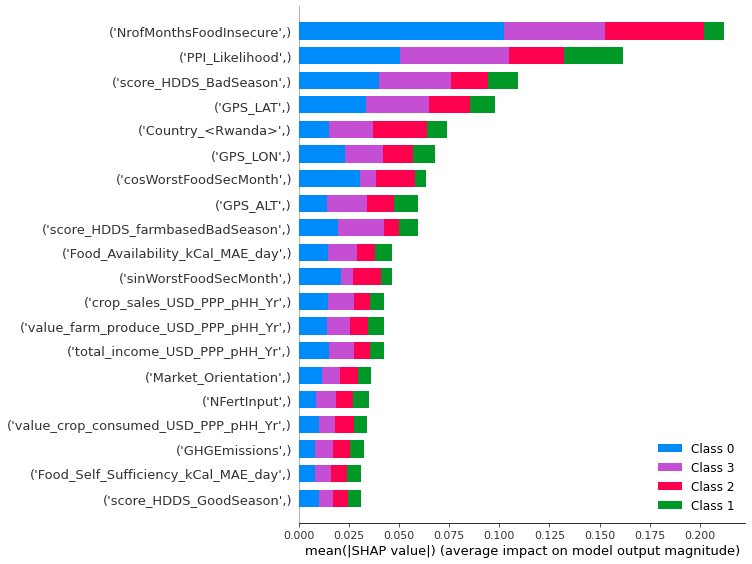

In [16]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test,approximate=True)
shap.summary_plot(shap_values, test, plot_type="bar")

In [1]:
shap.summary_plot(shap_values[3], test)

NameError: ignored

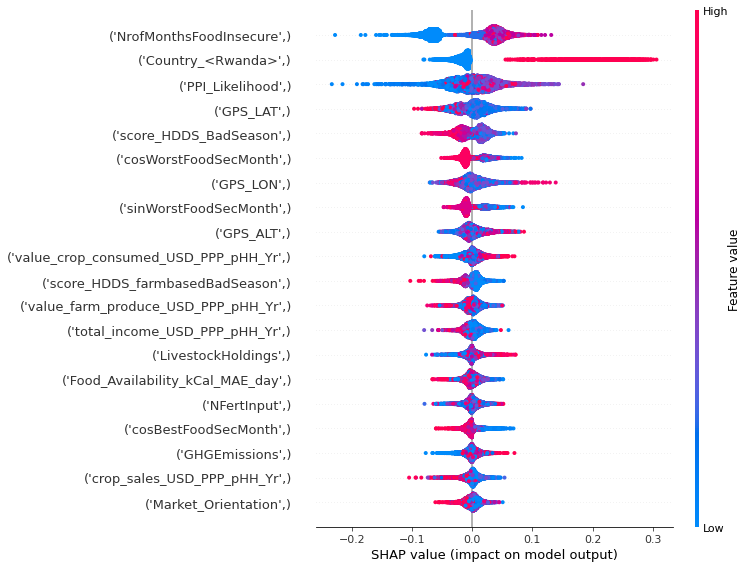

4


In [39]:
shap.summary_plot(shap_values[2], test)
print(len(shap_values))

In [21]:
classifiers[1].score(X_test, y_test)

0.6745409762651142

In [24]:
test

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,0.0,0.480271,0.457365,0.216580,0.1,0.16000,0.382979,0.166667,0.200000,0.0903,0.80,0.20,0.50,0.7,0.2,0.50,0.044544,0.144115,0.370054,0.073368,0.803460,0.087785,0.846318,0.222328,0.106175,0.779635,0.762679,0.000000,0.854920,0.588115,0.411885,0.588235,0.933013,0.750000,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.995759,0.527492,0.336787,0.1,0.30000,0.075435,0.166667,0.333333,0.0000,0.40,0.20,0.11,0.4,0.2,0.14,0.044773,0.000000,0.082447,0.125363,0.000000,0.000000,0.000000,1.000000,0.000000,0.135727,0.003892,0.250000,0.019779,1.000000,0.000000,0.122941,0.933013,0.750000,0.75,0.933013,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.350424,0.625556,0.284774,0.3,0.49675,0.543520,0.166667,0.200000,0.6490,1.00,0.40,0.00,0.5,0.1,0.10,0.000589,0.000000,0.315694,0.000000,0.557204,0.267599,0.933538,0.057946,0.379387,0.394167,0.952225,0.250000,0.718332,0.000810,0.999190,0.470588,0.500000,1.000000,1.00,0.500000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.446157,0.499264,0.197202,0.4,0.16000,0.058027,0.166667,0.200000,0.0050,0.76,0.22,0.42,1.0,0.1,0.50,0.052069,0.168459,0.128978,0.116635,0.148656,0.000000,0.000000,0.616899,0.000000,0.274333,0.252682,0.000000,0.055550,0.500000,0.500000,0.340471,0.933013,0.750000,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.422032,0.640934,0.405145,0.3,0.04000,0.500580,0.166667,0.200000,0.2390,1.00,0.60,0.20,0.5,0.0,0.20,0.034657,0.000000,0.165033,0.000000,0.160794,0.242405,0.547750,0.420258,0.657412,0.272016,0.317500,0.000000,0.373875,0.500000,0.500000,0.117647,0.000000,0.500000,0.75,0.066987,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [34]:
yy = data['Food_InsecurityLevel']
yy.unique()

array([3, 4, 2, 1], dtype=int32)

In [17]:
shap.initjs()
rf_explainer = shap.KernelExplainer(model.predict, tester)
rf_shap_values = rf_explainer.shap_values(tester)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


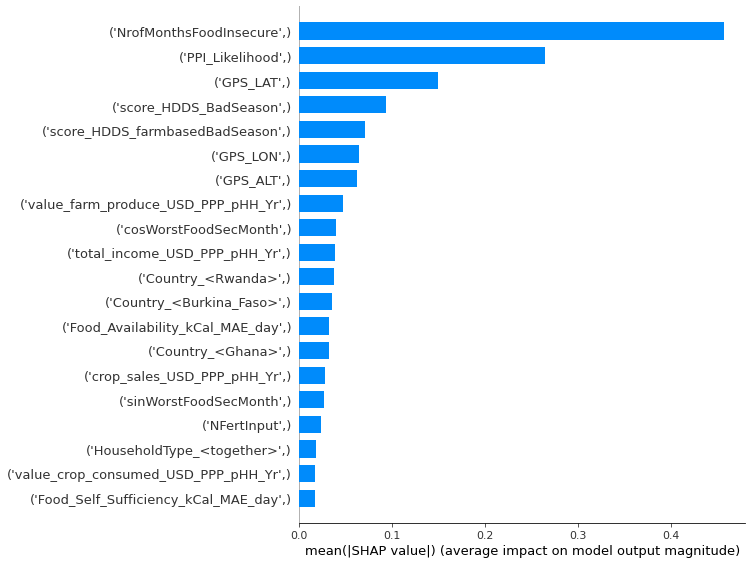

In [18]:
shap.summary_plot(rf_shap_values, tester, plot_type="bar")

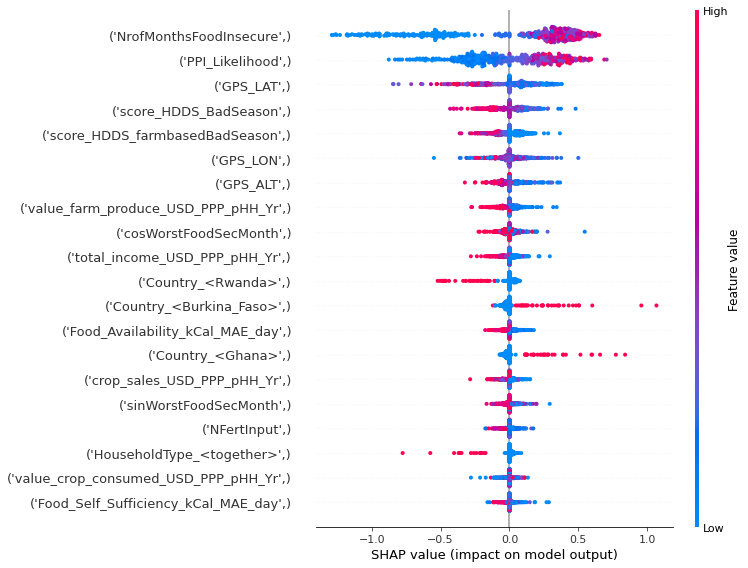

In [19]:
shap.summary_plot(rf_shap_values, tester)

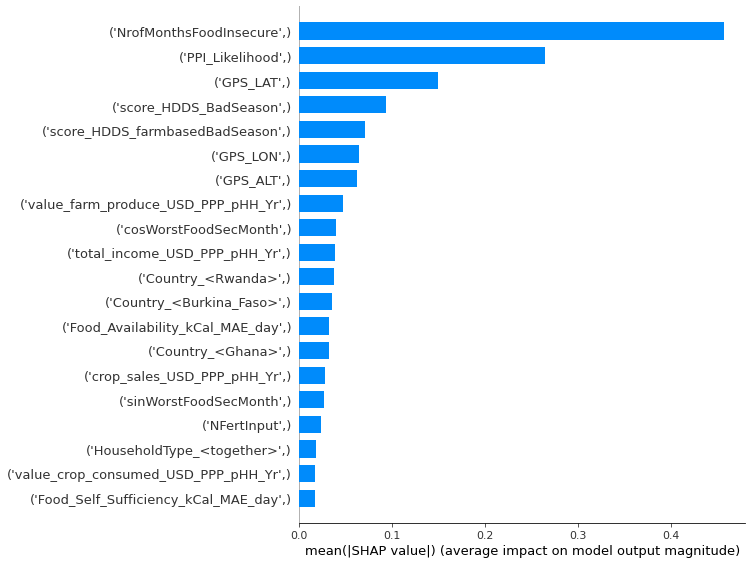

In [30]:
shap.summary_plot(rf_shap_values, tester, plot_type='bar')

In [20]:
shap.initjs()
shap.force_plot(rf_explainer.expected_value, rf_shap_values, test)

In [21]:
classifiers[1].score(X_test, y_test)

0.6765562024182714

In [22]:
tester

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
4513,0.0,0.422669,0.530098,0.259384,0.3,0.8014,0.398453,0.000000,0.200000,0.5830,0.7,0.0,0.50,0.4,0.0,0.20,0.000749,0.001211,0.376551,0.001887,0.990012,0.000000,0.000000,0.057812,0.000000,0.688392,0.926869,0.000000,0.832317,0.989685,0.010315,0.386353,0.933013,0.750000,0.750000,0.933013,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4901,0.0,0.559047,0.894140,0.186996,0.6,0.0795,0.058027,0.000000,0.200000,0.0947,0.5,0.0,0.00,0.5,0.0,0.00,0.013808,0.044674,0.295460,0.000000,0.782432,0.045450,0.000000,0.119780,0.068849,0.322040,0.703365,0.000000,0.012976,0.000000,0.000000,0.258824,0.066987,0.250000,0.750000,0.933013,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4511,0.0,0.428664,0.618352,0.298942,0.1,0.0400,0.058027,0.583333,0.200000,0.0000,0.7,0.4,0.40,0.6,0.3,0.30,0.000000,0.000000,0.082349,0.000000,0.234199,0.000000,0.000000,0.054697,0.000000,0.059517,0.144511,0.000000,0.007497,0.000000,1.000000,0.054588,0.933013,0.750000,0.500000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
343,0.0,0.469896,0.449752,0.212272,0.6,0.3200,0.579304,0.166667,0.200000,0.1057,0.6,0.0,0.20,0.5,0.0,0.00,0.094330,0.000000,0.193790,0.264123,0.057121,0.000000,0.000000,0.902027,0.000000,0.097846,0.024818,0.000000,0.661783,1.000000,0.000000,0.529412,0.066987,0.750000,0.750000,0.933013,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6115,0.0,0.393528,0.627855,0.314028,0.9,0.7550,0.668472,0.000000,0.200000,0.3120,0.7,0.6,0.00,0.7,0.6,0.00,0.272551,0.000000,0.951274,0.081618,0.903442,0.740943,0.087587,0.239032,0.073180,0.816109,0.740648,0.250000,0.530496,0.517776,0.482224,0.600000,0.250000,0.066987,0.750000,0.933013,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [23]:
y_train

5623     3
32426    3
5934     4
16092    1
30533    1
        ..
20757    4
32103    1
30403    1
21243    4
2732     1
Name: Food_InsecurityLevel, Length: 26796, dtype: int32